In [107]:
import zipfile
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [108]:
%matplotlib inline

In [109]:
zipfile.ZipFile('weather.zip').extractall('.')

In [110]:
ls weather

 Volume in drive C is Windows
 Volume Serial Number is 7C81-A658

 Directory of C:\Users\whats\weather

09/19/2023  01:44 AM    <DIR>          .
09/19/2023  01:44 AM    <DIR>          ..
09/20/2023  03:03 PM            44,303 project2.ipynb
09/20/2023  03:03 PM            24,088 readme.txt
09/20/2023  03:03 PM         1,711,530 RSM00030710.dly
09/20/2023  03:03 PM         8,523,546 stations.txt
09/20/2023  03:03 PM         4,165,020 USW00014922.dly
09/20/2023  03:03 PM         3,692,790 USW00022536.dly
09/20/2023  03:03 PM         3,502,710 USW00023188.dly
09/20/2023  03:03 PM               576 weather.README
               8 File(s)     21,664,563 bytes
               2 Dir(s)  73,573,462,016 bytes free


In [111]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [112]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [113]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [114]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [115]:
minneapolis_tmax = getobs('weather/USW00014922.dly','TMAX')
minneapolis_tmin = getobs('weather/USW00014922.dly','TMIN')

In [116]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [117]:
fillnans(minneapolis_tmax)
fillnans(minneapolis_tmin)

In [118]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [119]:
minneapolis_tmax_all = np.vstack([selectyear(minneapolis_tmax,year)[:365] for year in range(1940,2014 + 1)])

In [120]:
minneapolis_mean = np.mean(minneapolis_tmax_all, axis = 1)

In [121]:
minneapolis_mean

array([11.83917808, 13.82547945, 12.75561644, 11.87452055, 13.12520548,
       11.6430137 , 13.43260274, 12.54328767, 13.36410959, 13.54219178,
       10.8569863 , 10.44876712, 12.80109589, 13.64356164, 12.78493151,
       12.96191781, 12.65589041, 12.49863014, 13.10438356, 12.94986301,
       12.18849315, 12.48767123, 11.22136986, 12.85616438, 13.30027397,
       11.0890411 , 11.89205479, 11.47780822, 12.64821918, 12.27178082,
       12.07945205, 12.01835616, 10.28465753, 13.11643836, 12.26849315,
       12.26465753, 13.88438356, 12.65945205, 12.21123288, 11.47726027,
       12.87780822, 13.33589041, 12.05726027, 12.1709589 , 12.2860274 ,
       11.75835616, 12.51917808, 15.14986301, 13.84164384, 12.12493151,
       14.04356164, 12.83013699, 12.28273973, 11.29589041, 12.78767123,
       12.55753425, 11.15534247, 12.08328767, 14.54383562, 14.02438356,
       12.90739726, 13.54109589, 12.88109589, 12.93671233, 12.8539726 ,
       13.77972603, 14.43068493, 13.70465753, 12.10739726, 12.33

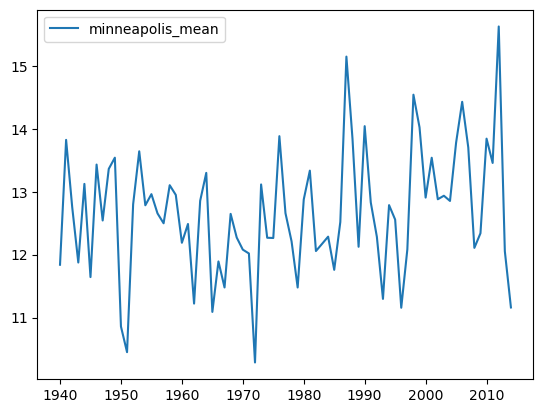

In [122]:
years = np.arange(1940,2014 + 1)

pp.plot(years, minneapolis_mean, label="minneapolis_mean")
pp.legend(loc="best")

In [123]:
minneapolis_max_temp = minneapolis_mean[np.argmax(minneapolis_mean)]

minneapolis_warmest = int(np.interp(minneapolis_max_temp, minneapolis_mean,years, period=365))

In [124]:
minneapolis_warmest

2012

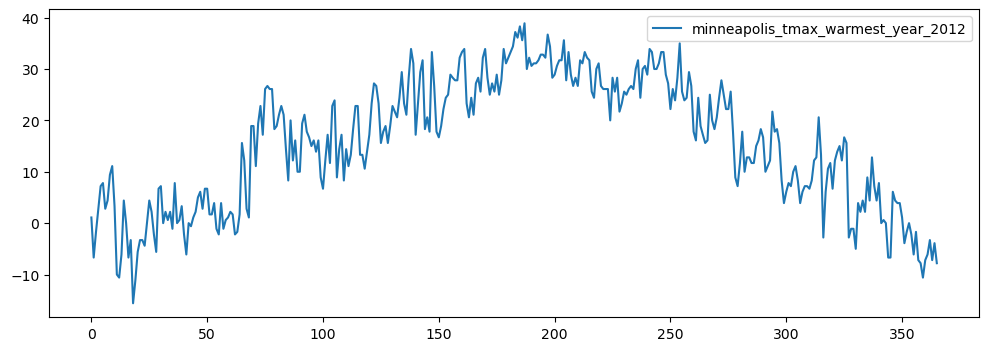

In [125]:
pp.figure(figsize=(12,4))

minneapolis_tmax_warmest_year_2012 = selectyear(minneapolis_tmax, minneapolis_warmest)
minneapolis_tmin_warmest_year_2012 = selectyear(minneapolis_tmin, minneapolis_warmest)

pp.plot(minneapolis_tmax_warmest_year_2012, label="minneapolis_tmax_warmest_year_2012")
pp.legend(loc="best")

In [126]:
sandiego_tmin = getobs('weather/USW00023188.dly','TMIN')
sandiego_tmax = getobs('weather/USW00023188.dly','TMAX')

In [127]:
fillnans(sandiego_tmin)
fillnans(sandiego_tmax)

In [128]:
sandiego_tmin_all = np.vstack([selectyear(sandiego_tmin,year)[:365] for year in range(1940,2014 + 1)])

In [129]:
sandiego_mean = np.mean(sandiego_tmin_all, axis = 1)

In [130]:
sandiego_mean

array([13.36575342, 13.33753425, 12.46356164, 12.86931507, 12.05726027,
       12.68109589, 12.81534247, 12.64493151, 11.66082192, 12.16657534,
       12.72684932, 12.90739726, 12.76410959, 12.87671233, 13.33068493,
       12.90712329, 13.02246575, 14.01452055, 14.33506849, 14.75068493,
       13.25671233, 13.30767123, 12.72273973, 13.15342466, 12.54630137,
       12.93726027, 13.53287671, 13.4709589 , 13.96246575, 14.03945205,
       14.17616438, 13.37232877, 13.92493151, 13.83589041, 13.95452055,
       13.20986301, 15.01342466, 15.11479452, 15.6539726 , 15.02931507,
       15.29945205, 16.17452055, 14.92410959, 16.23315068, 16.39178082,
       14.59561644, 14.14      , 13.8109589 , 13.87808219, 13.80273973,
       13.98465753, 13.5169863 , 14.8830137 , 14.23671233, 13.69643836,
       14.31835616, 14.83890411, 15.1230137 , 14.13123288, 13.40273973,
       14.43808219, 13.93890411, 13.73917808, 14.53835616, 15.09013699,
       14.73643836, 14.76273973, 13.99506849, 14.16246575, 14.42

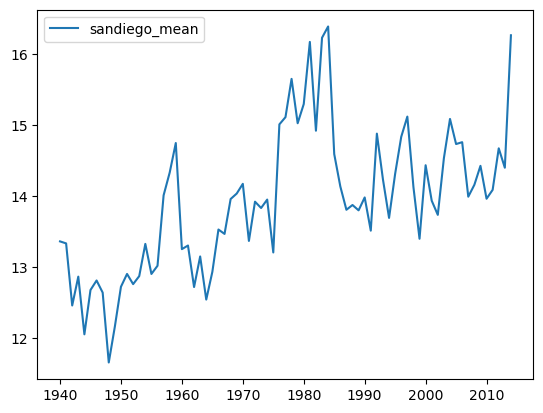

In [131]:
pp.plot(years, sandiego_mean, label="sandiego_mean")
pp.legend(loc="best")

In [132]:
sandiego_min_temp = sandiego_mean[np.argmin(sandiego_mean)]

sandiego_coldest = int(np.interp(sandiego_min_temp, sandiego_mean,years, period=365))

In [133]:
sandiego_coldest

1948

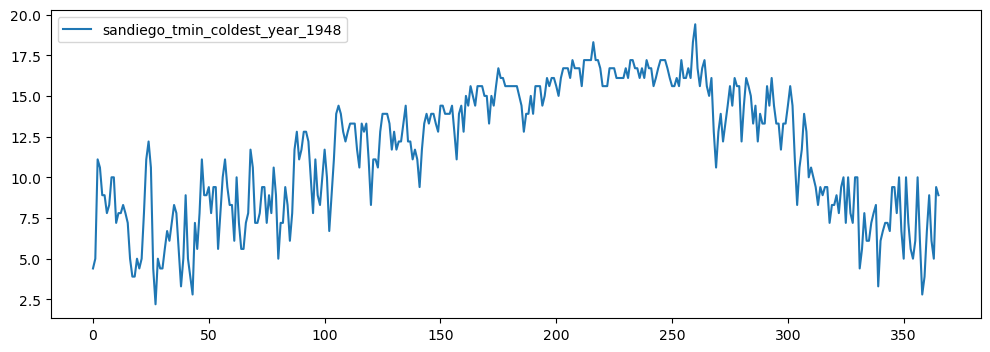

In [134]:
pp.figure(figsize=(12,4))

sandiego_tmin_coldest_year_1948 = selectyear(sandiego_tmin, sandiego_coldest)
sandiego_tmax_coldest_year_1948 = selectyear(sandiego_tmax, sandiego_coldest)

pp.plot(sandiego_tmin_coldest_year_1948, label="sandiego_tmin_coldest_year_1948")
pp.legend(loc="best")

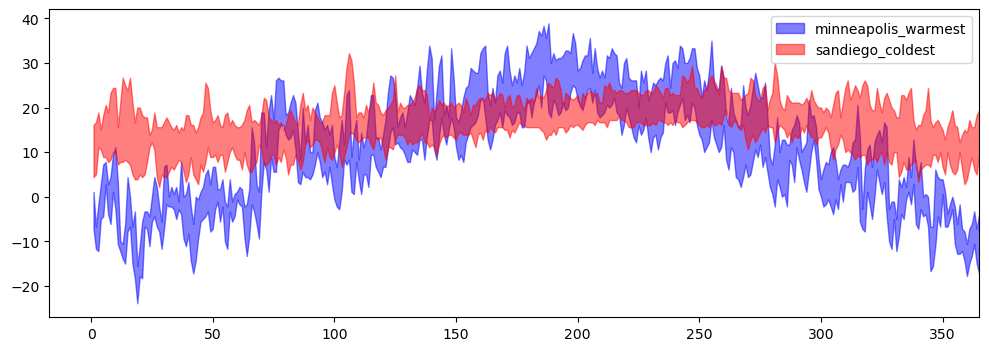

In [135]:
pp.figure(figsize=(12,4))

days = np.arange(1,365 + 2)

pp.fill_between(days,minneapolis_tmax_warmest_year_2012,minneapolis_tmin_warmest_year_2012, alpha = 0.5, color = 'blue', label = 'minneapolis_warmest') 

pp.fill_between(days,sandiego_tmax_coldest_year_1948,sandiego_tmin_coldest_year_1948, alpha = 0.5, color = 'red', label = 'sandiego_coldest') 

pp.axis(xmax = 365)
pp.legend(loc="best")